# Privacy Attacks

In [54]:
import os
import matplotlib.pyplot as plt

import torch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [55]:
torch.set_num_threads(1)
cwd = os.path.join(os.getcwd(), '..', '..')

p_indian_list = [0.005, 0.01, 0.05,
                 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9,
                 0.95, 0.99, 0.995]
out_rate = 1000

## Attack sketches

In [56]:
all_cores_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'cores')

acc_diffs_cores = []
for p in p_indian_list:
    p_acc_diff = []
    for idx in range(10):
        cores_dir = os.path.join(all_cores_dir, str(p), str(idx))
        files_lst = os.listdir(cores_dir)
        for f in files_lst:
            test_acc = float(f.split('_')[1])
            sketch_acc = float(f.split('_')[2][:-3])
            p_acc_diff.append(sketch_acc - test_acc)
        
    p_acc_diff = torch.Tensor(p_acc_diff)
    acc_diffs_cores.append((p, (p_acc_diff.mean(), p_acc_diff.std())))

acc_diffs_cores = dict(acc_diffs_cores)
acc_diffs_cores

{0.005: (tensor(0.0359), tensor(0.0326)),
 0.01: (tensor(0.0321), tensor(0.0342)),
 0.05: (tensor(0.0187), tensor(0.0339)),
 0.1: (tensor(0.0100), tensor(0.0367)),
 0.2: (tensor(0.0186), tensor(0.0376)),
 0.3: (tensor(0.0053), tensor(0.0377)),
 0.5: (tensor(0.0103), tensor(0.0414)),
 0.7: (tensor(0.0066), tensor(0.0432)),
 0.8: (tensor(-0.0006), tensor(0.0444)),
 0.9: (tensor(0.0127), tensor(0.0449)),
 0.95: (tensor(0.0055), tensor(0.0414)),
 0.99: (tensor(0.0090), tensor(0.0422)),
 0.995: (tensor(0.0023), tensor(0.0433))}

In [4]:
all_recores_dir = os.path.join(cwd,'results', '6_privacy', 'fffc_tiny', 'recores')

acc_diffs_recores = []
for p in p_indian_list:
    p_acc_diff = []
    for idx in range(10):
        recores_dir = os.path.join(all_recores_dir, str(p), str(idx))
        files_lst = os.listdir(recores_dir)
        for f in files_lst:
            test_acc = float(f.split('_')[1])
            sketch_acc = float(f.split('_')[2][:-3])
            p_acc_diff.append(sketch_acc - test_acc)
        
    p_acc_diff = torch.Tensor(p_acc_diff)
    acc_diffs_recores.append((p, (p_acc_diff.mean(), p_acc_diff.std())))

acc_diffs_recores = dict(acc_diffs_recores)
acc_diffs_recores

{0.005: (tensor(-0.0008), tensor(0.0286)),
 0.01: (tensor(0.0067), tensor(0.0279)),
 0.05: (tensor(-0.0011), tensor(0.0304)),
 0.1: (tensor(0.0004), tensor(0.0312)),
 0.2: (tensor(-0.0008), tensor(0.0353)),
 0.3: (tensor(0.0013), tensor(0.0351)),
 0.5: (tensor(0.0012), tensor(0.0377)),
 0.7: (tensor(-0.0021), tensor(0.0382)),
 0.8: (tensor(-0.0032), tensor(0.0357)),
 0.9: (tensor(0.0146), tensor(0.0299)),
 0.95: (tensor(0.0062), tensor(0.0323)),
 0.99: (tensor(-0.0005), tensor(0.0385)),
 0.995: (tensor(0.0036), tensor(0.0388))}

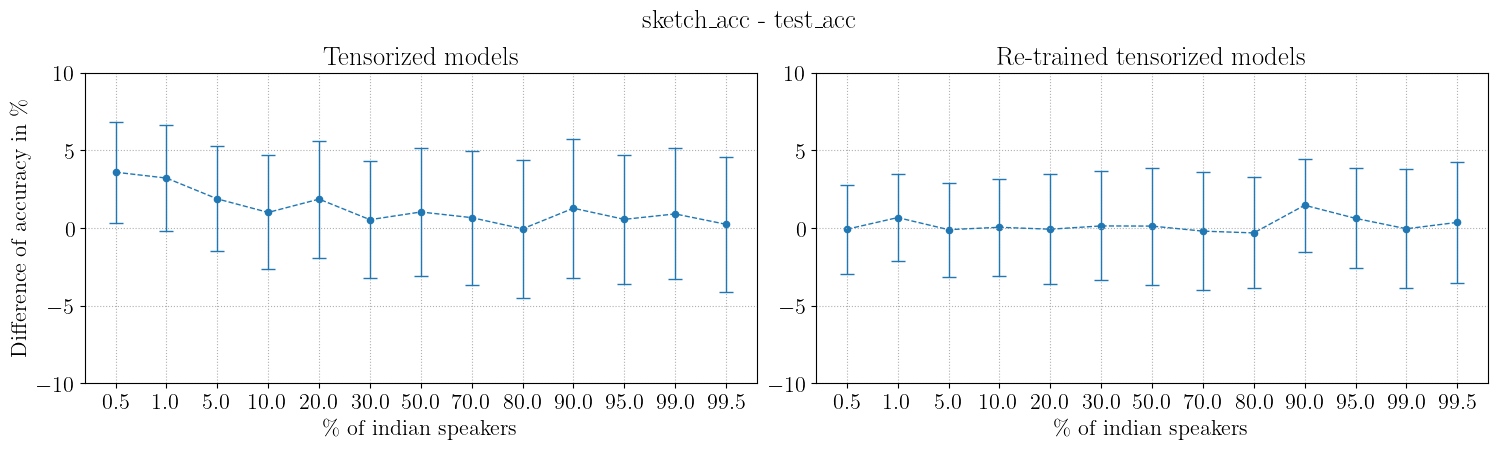

In [5]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
# colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

fig, axs = plt.subplots(1, 2, figsize=(15, 4.5))
p_str = [str(p * 100) for p in p_indian_list]

# Cores
# -----
means = torch.stack(list(map(lambda t: t[0] * 100,
                             acc_diffs_cores.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100,
                            acc_diffs_cores.values()))).tolist()

axs[0].errorbar(x=p_str, y=means, yerr=stds, capsize=5.,
                linestyle='--', linewidth=1., color='tab:blue')
axs[0].scatter(x=p_str, y=means, marker='o', s=20., color='tab:blue')

# Set axes
axs[0].set_xlabel('\% of indian speakers')
axs[0].set_ylabel('Difference of accuracy in \%')
axs[0].set_title('Tensorized models')

axs[0].set_ylim(-10, 10)
axs[0].yaxis.grid(linestyle=':')
axs[0].xaxis.grid(linestyle=':')

# Recores
# -------
means = torch.stack(list(map(lambda t: t[0] * 100,
                             acc_diffs_recores.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100,
                            acc_diffs_recores.values()))).tolist()

axs[1].errorbar(x=p_str, y=means, yerr=stds, capsize=5.,
                linestyle='--', linewidth=1., color='tab:blue')
axs[1].scatter(x=p_str, y=means, marker='o', s=20., color='tab:blue')

# Set axes
axs[1].set_xlabel('\% of indian speakers')
axs[1].set_title('Re-trained tensorized models')

axs[1].set_ylim(-10, 10)
axs[1].yaxis.grid(linestyle=':')
axs[1].xaxis.grid(linestyle=':')


fig.suptitle('sketch_acc - test_acc')

plt.tight_layout(pad=0.5)
plt.show()

## NNs

In [6]:
accs = torch.load(os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny',
                               'attacks', 'plot_attack_bb_nn.pt'),
                  weights_only=False)
accs = dict(accs)
accs

{0.005: (tensor(0.8646), tensor(0.0079)),
 0.01: (tensor(0.8664), tensor(0.0080)),
 0.05: (tensor(0.8752), tensor(0.0081)),
 0.1: (tensor(0.8855), tensor(0.0091)),
 0.2: (tensor(0.8998), tensor(0.0079)),
 0.3: (tensor(0.9062), tensor(0.0077)),
 0.5: (tensor(0.9095), tensor(0.0078)),
 0.7: (tensor(0.9000), tensor(0.0081)),
 0.8: (tensor(0.8907), tensor(0.0091)),
 0.9: (tensor(0.8719), tensor(0.0087)),
 0.95: (tensor(0.8652), tensor(0.0087)),
 0.99: (tensor(0.8565), tensor(0.0079)),
 0.995: (tensor(0.8543), tensor(0.0084))}

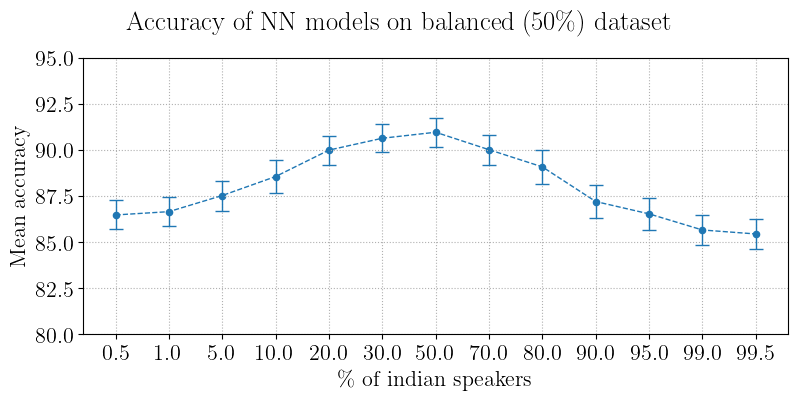

In [7]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
# colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

fig, axs = plt.subplots(1, 1, figsize=(8, 4))
p_str = [str(p * 100) for p in p_indian_list]

# NNs
# ---
means = torch.stack(list(map(lambda t: t[0] * 100, accs.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100, accs.values()))).tolist()

axs.errorbar(x=p_str, y=means, yerr=stds, capsize=5.,
             linestyle='--', linewidth=1., color='tab:blue')
axs.scatter(x=p_str, y=means, marker='o', s=20., color='tab:blue')

# Set axes
axs.set_xlabel('\% of indian speakers')
axs.set_ylabel('Mean accuracy')

axs.set_ylim(80, 95)
axs.yaxis.grid(linestyle=':')
axs.xaxis.grid(linestyle=':')


fig.suptitle('Accuracy of NN models on balanced (50\%) dataset')

plt.tight_layout(pad=0.5)
plt.show()

In [57]:
# Create BB dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks_softmax', 'nn')

datasets = {}
for p in p_indian_list[:6]:
    # print(p)
    samples = []
    labels = []
    for idx in range(10):
        # print('\t', idx)
        for s in range(25):
            # print('\t\t', s)
            for aux_p in [p, 1 - p]:
                # print('\t\t\t', aux_p)
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                samples.append(sample)
                labels.append(label)
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [58]:
# Black-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #) #random_state=0)
        clf = clf.fit(X_train[:, :40], y_train)
        
        train_score = clf.score(X_train[:, :40], y_train)
        test_score = clf.score(X_test[:, :40], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(1.)
0.01 tensor(1.) tensor(1.)
0.05 tensor(1.) tensor(1.)
0.1 tensor(1.) tensor(1.)
0.2 tensor(1.) tensor(1.)
0.3 tensor(1.) tensor(1.)


In [10]:
# Black-box only with american women
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, :10], y_train)
        
        train_score = clf.score(X_train[:, :10], y_train)
        test_score = clf.score(X_test[:, :10], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(1.)
0.01 tensor(1.) tensor(1.)
0.05 tensor(1.) tensor(1.)
0.1 tensor(1.) tensor(1.)
0.2 tensor(0.9980) tensor(0.9960)
0.3 tensor(0.9922) tensor(0.9900)


In [11]:
# Black-box only with indian women
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, 10:20], y_train)
        
        train_score = clf.score(X_train[:, 10:20], y_train)
        test_score = clf.score(X_test[:, 10:20], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9980)
0.01 tensor(1.) tensor(1.)
0.05 tensor(1.) tensor(0.9980)
0.1 tensor(1.) tensor(0.9980)
0.2 tensor(0.9884) tensor(0.9820)
0.3 tensor(0.8858) tensor(0.8840)


In [12]:
# Black-box only with american men
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, 20:30], y_train)
        
        train_score = clf.score(X_train[:, 20:30], y_train)
        test_score = clf.score(X_test[:, 20:30], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(1.)
0.01 tensor(0.9980) tensor(0.9980)
0.05 tensor(1.) tensor(1.)
0.1 tensor(0.9980) tensor(0.9960)
0.2 tensor(0.9924) tensor(0.9880)
0.3 tensor(0.9700) tensor(0.9620)


In [13]:
# Black-box only with indian men
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, 30:40], y_train)
        
        train_score = clf.score(X_train[:, 30:40], y_train)
        test_score = clf.score(X_test[:, 30:40], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(1.)
0.01 tensor(1.) tensor(1.)
0.05 tensor(1.) tensor(1.)
0.1 tensor(1.) tensor(1.)
0.2 tensor(0.9984) tensor(0.9980)
0.3 tensor(0.9856) tensor(0.9760)


In [14]:
# White-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :200]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, 200:]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        X_train = torch.cat([torch.Tensor(X_train_bb),
                             torch.Tensor(X_train_wb)], dim=1)
        
        y_train = y[train]
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :40]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, 40:]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        X_test = torch.cat([torch.Tensor(X_test_bb),
                            torch.Tensor(X_test_wb)], dim=1)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(1.)
0.01 tensor(1.) tensor(0.9980)
0.05 tensor(1.) tensor(1.)
0.1 tensor(1.) tensor(0.9980)
0.2 tensor(1.) tensor(0.9900)
0.3 tensor(1.) tensor(0.9200)


In [15]:
# Only white-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, 40:], y_train)
        
        train_score = clf.score(X_train[:, 40:], y_train)
        test_score = clf.score(X_test[:, 40:], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9960)
0.01 tensor(1.) tensor(0.9980)
0.05 tensor(1.) tensor(1.)
0.1 tensor(1.) tensor(0.9980)
0.2 tensor(1.) tensor(0.9840)
0.3 tensor(1.) tensor(0.8920)


In [16]:
X, y = datasets[0.3]

In [17]:
# Modelos en mayoria india
y[torch.arange(0, 500, 2)].mean()

tensor(0.)

In [18]:
# Mujeres
((X[torch.arange(0, 500, 2), :20] > 0.5).sum(dim=1) / 100).mean()

tensor(0.1846)

In [19]:
# Mujeres americanas
((X[torch.arange(0, 500, 2), :10] > 0.5).sum(dim=1) / 50).mean()

tensor(0.1766)

In [20]:
# Mujeres indias
((X[torch.arange(0, 500, 2), 10:20] > 0.5).sum(dim=1) / 50).mean()

tensor(0.1925)

In [21]:
# Hombres
((X[torch.arange(0, 500, 2), 20:40] > 0.5).sum(dim=1) / 100).mean()

tensor(0.0192)

In [22]:
# Hombres americanos
((X[torch.arange(0, 500, 2), 20:30] > 0.5).sum(dim=1) / 50).mean()

tensor(0.0192)

In [23]:
# Hombres indios
((X[torch.arange(0, 500, 2), 30:40] > 0.5).sum(dim=1) / 50).mean()

tensor(0.0193)

In [24]:
# Todos
((X[torch.arange(0, 500, 2), :40] > 0.5).sum(dim=1) / 200).mean()

tensor(0.1019)

In [25]:
# Modelos en mayoria americana
y[1 + torch.arange(0, 500, 2)].mean()

tensor(1.)

In [26]:
# Mujeres
((X[1 + torch.arange(0, 500, 2), :20] > 0.5).sum(dim=1) / 100).mean()

tensor(0.1910)

In [27]:
# Mujeres americanas
((X[1 + torch.arange(0, 500, 2), :10] > 0.5).sum(dim=1) / 50).mean()

tensor(0.1882)

In [28]:
# Mujeres indias
((X[1 + torch.arange(0, 500, 2), 10:20] > 0.5).sum(dim=1) / 50).mean()

tensor(0.1938)

In [29]:
# Hombres
((X[1 + torch.arange(0, 500, 2), 20:40] > 0.5).sum(dim=1) / 100).mean()

tensor(0.0294)

In [30]:
# Hombres americanos
((X[1 + torch.arange(0, 500, 2), 20:30] > 0.5).sum(dim=1) / 50).mean()

tensor(0.0197)

In [31]:
# Hombres indios
((X[1 + torch.arange(0, 500, 2), 30:40] > 0.5).sum(dim=1) / 50).mean()

tensor(0.0390)

In [32]:
# Todos
((X[1 + torch.arange(0, 500, 2), :40] > 0.5).sum(dim=1) / 200).mean()

tensor(0.1102)

In [33]:
X[:10, [0, 1, 2, 3, 4, 5]] 

tensor([[0.3291, 0.9998, 0.7824, 0.8894, 0.7154, 0.9292],
        [0.8868, 0.9999, 0.8161, 0.8396, 0.9268, 0.9549],
        [0.5385, 1.0000, 0.8787, 0.8986, 0.8893, 0.9294],
        [0.7817, 0.9999, 0.8968, 0.7914, 0.8870, 0.9041],
        [0.3827, 1.0000, 0.8019, 0.8315, 0.8567, 0.9748],
        [0.9014, 0.9999, 0.9743, 0.8797, 0.9433, 0.9179],
        [0.5215, 1.0000, 0.9823, 0.8829, 0.7908, 0.9663],
        [0.7067, 0.9971, 0.8594, 0.7444, 0.8455, 0.9497],
        [0.4819, 1.0000, 0.8183, 0.8928, 0.8239, 0.9372],
        [0.9102, 0.9998, 0.8044, 0.8382, 0.9670, 0.9207]])

In [34]:
(X[0, :10] - X[1, :10]).abs()

tensor([5.5770e-01, 1.2940e-04, 3.3732e-02, 4.9812e-02, 2.1134e-01, 2.5703e-02,
        2.4423e-01, 7.5930e-04, 3.2620e-02, 1.8600e-01])

In [35]:
(X[0, 10:20] - X[1, 10:20]).abs()

tensor([6.7949e-03, 1.3207e-03, 1.3474e-01, 9.6278e-03, 1.9312e-01, 2.8133e-05,
        9.9539e-03, 4.0165e-02, 9.9174e-03, 9.3751e-03])

In [36]:
X[:10, [0, 1, 10, 11, 20, 21, 30, 31]]

tensor([[0.3291, 0.9998, 0.9639, 0.9937, 0.7363, 0.0609, 0.2153, 0.6643],
        [0.8868, 0.9999, 0.9707, 0.9951, 0.6492, 0.0744, 0.2162, 0.9516],
        [0.5385, 1.0000, 0.9632, 1.0000, 0.7673, 0.0342, 0.1238, 0.7413],
        [0.7817, 0.9999, 0.9321, 0.9999, 0.6727, 0.1049, 0.2130, 0.8819],
        [0.3827, 1.0000, 0.9865, 0.9997, 0.5644, 0.0443, 0.1741, 0.6963],
        [0.9014, 0.9999, 0.9905, 0.9715, 0.8673, 0.0565, 0.1071, 0.9325],
        [0.5215, 1.0000, 0.9868, 0.9999, 0.6673, 0.0671, 0.2261, 0.4446],
        [0.7067, 0.9971, 0.9592, 0.9503, 0.6387, 0.2161, 0.1738, 0.9318],
        [0.4819, 1.0000, 0.9906, 0.9998, 0.6552, 0.0145, 0.1251, 0.8553],
        [0.9102, 0.9998, 0.9537, 0.9839, 0.8054, 0.0983, 0.0951, 0.9109]])

In [37]:
y[:10]

tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

In [38]:
X[50:60, [0, 1, 10, 11, 20, 21, 30, 31]]

tensor([[0.3733, 0.9995, 0.9798, 0.9953, 0.5540, 0.0457, 0.0806, 0.6949],
        [0.8831, 1.0000, 0.8747, 0.9989, 0.6176, 0.1018, 0.2457, 0.8852],
        [0.4395, 0.9998, 0.9860, 0.9999, 0.6197, 0.0988, 0.0459, 0.6666],
        [0.8268, 1.0000, 0.9711, 0.9982, 0.8383, 0.1331, 0.2788, 0.8292],
        [0.3466, 0.9998, 0.9034, 0.9996, 0.6645, 0.0884, 0.0372, 0.5717],
        [0.6727, 0.9999, 0.9423, 1.0000, 0.6951, 0.1013, 0.2339, 0.8940],
        [0.4511, 0.9998, 0.9687, 0.9993, 0.8039, 0.0286, 0.3112, 0.6200],
        [0.8824, 0.9993, 0.9911, 0.9988, 0.7822, 0.1850, 0.3687, 0.8950],
        [0.2930, 0.9998, 0.9872, 1.0000, 0.6101, 0.0534, 0.0241, 0.5383],
        [0.9123, 1.0000, 0.9789, 0.9998, 0.8140, 0.0403, 0.4356, 0.9112]])

In [39]:
y[50:60]

tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

In [40]:
X[100:110, [0, 1, 10, 11, 20, 21, 30, 31]]

tensor([[0.3492, 1.0000, 0.9580, 0.9999, 0.6504, 0.0653, 0.0261, 0.7614],
        [0.6437, 0.9999, 0.9019, 1.0000, 0.6892, 0.0504, 0.2799, 0.8113],
        [0.4302, 0.9999, 0.9764, 1.0000, 0.6607, 0.0128, 0.2377, 0.6878],
        [0.6739, 1.0000, 0.9763, 1.0000, 0.6034, 0.0598, 0.4228, 0.9127],
        [0.5112, 1.0000, 0.9748, 0.9999, 0.7833, 0.0410, 0.1707, 0.7665],
        [0.6887, 1.0000, 0.9820, 1.0000, 0.6162, 0.1592, 0.0849, 0.7294],
        [0.6474, 1.0000, 0.9902, 1.0000, 0.8228, 0.0188, 0.3508, 0.8252],
        [0.7655, 0.9999, 0.9847, 0.9999, 0.5322, 0.1642, 0.5414, 0.8065],
        [0.4072, 0.9996, 0.9803, 1.0000, 0.7881, 0.0483, 0.2618, 0.5074],
        [0.7267, 0.9997, 0.9636, 0.9987, 0.7063, 0.0498, 0.0666, 0.8606]])

In [41]:
y[100:110]

tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

## MPS

In [42]:
# Create BB dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks_softmax', 'cores')

datasets = {}
for p in p_indian_list[:6]:
    samples = []
    labels = []
    for idx in range(10):
        for s in range(25):
            for aux_p in [p, 1 - p]:
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                samples.append(sample)
                labels.append(label)
    
    min_len = samples[0].size(0)
    for s in samples[1:]:
        if s.size(0) < min_len:
            min_len = s.size(0)
    
    samples = [s[:min_len] for s in samples]
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [43]:
# Black-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, :40], y_train)
        
        train_score = clf.score(X_train[:, :40], y_train)
        test_score = clf.score(X_test[:, :40], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9960)
0.01 tensor(1.) tensor(0.9980)
0.05 tensor(1.) tensor(0.9980)
0.1 tensor(1.) tensor(1.)
0.2 tensor(1.) tensor(0.9980)
0.3 tensor(0.9962) tensor(0.9800)


In [44]:
# White-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :40]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, 40:]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        X_train = torch.cat([torch.Tensor(X_train_bb),
                             torch.Tensor(X_train_wb)], dim=1)
        
        y_train = y[train]
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :40]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, 40:]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        X_test = torch.cat([torch.Tensor(X_test_bb),
                            torch.Tensor(X_test_wb)], dim=1)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9740)
0.01 tensor(1.) tensor(0.9720)
0.05 tensor(1.) tensor(0.9840)
0.1 tensor(1.) tensor(0.9340)
0.2 tensor(1.) tensor(0.9660)
0.3 tensor(1.) tensor(0.9520)


In [45]:
# Only white-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, 40:], y_train)
        
        train_score = clf.score(X_train[:, 40:], y_train)
        test_score = clf.score(X_test[:, 40:], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9580)
0.01 tensor(1.) tensor(0.9580)
0.05 tensor(1.) tensor(0.9480)
0.1 tensor(1.) tensor(0.9140)
0.2 tensor(1.) tensor(0.9520)
0.3 tensor(1.) tensor(0.9220)


## Re-trained MPS

In [46]:
# Create BB dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks_softmax', 'recores')

datasets = {}
for p in p_indian_list[:6]:
    samples = []
    labels = []
    for idx in range(10):
        for s in range(25):
            for aux_p in [p, 1 - p]:
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                samples.append(sample)
                labels.append(label)
    
    min_len = samples[0].size(0)
    for s in samples[1:]:
        if s.size(0) < min_len:
            min_len = s.size(0)
    
    samples = [s[:min_len] for s in samples]
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [47]:
# Black-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, :40], y_train)
        
        train_score = clf.score(X_train[:, :40], y_train)
        test_score = clf.score(X_test[:, :40], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9980)
0.01 tensor(1.) tensor(0.9980)
0.05 tensor(1.) tensor(0.9980)
0.1 tensor(1.) tensor(0.9980)
0.2 tensor(1.) tensor(1.)
0.3 tensor(1.) tensor(0.9940)


In [48]:
# White-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :40]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, 40:]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        X_train = torch.cat([torch.Tensor(X_train_bb),
                             torch.Tensor(X_train_wb)], dim=1)
        
        y_train = y[train]
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :40]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, 40:]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        X_test = torch.cat([torch.Tensor(X_test_bb),
                            torch.Tensor(X_test_wb)], dim=1)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9800)
0.01 tensor(1.) tensor(0.9740)
0.05 tensor(1.) tensor(0.9860)
0.1 tensor(1.) tensor(0.9500)
0.2 tensor(1.) tensor(0.9660)
0.3 tensor(1.) tensor(0.9480)


In [49]:
# Only white-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, 40:], y_train)
        
        train_score = clf.score(X_train[:, 40:], y_train)
        test_score = clf.score(X_test[:, 40:], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9580)
0.01 tensor(1.) tensor(0.9540)
0.05 tensor(1.) tensor(0.9480)
0.1 tensor(1.) tensor(0.9140)
0.2 tensor(1.) tensor(0.9520)
0.3 tensor(1.) tensor(0.9220)


## Re-trained private MPS

In [50]:
# Create BB dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks_softmax', 'priv_recores')

datasets = {}
for p in p_indian_list[:6]:
    samples = []
    labels = []
    for idx in range(10):
        for s in range(25):
            for aux_p in [p, 1 - p]:
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                samples.append(sample)
                labels.append(label)
    
    min_len = samples[0].size(0)
    for s in samples[1:]:
        if s.size(0) < min_len:
            min_len = s.size(0)
    
    samples = [s[:min_len] for s in samples]
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [51]:
# Black-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train[:, :40], y_train)
        
        train_score = clf.score(X_train[:, :40], y_train)
        test_score = clf.score(X_test[:, :40], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9980)
0.01 tensor(1.) tensor(0.9980)
0.05 tensor(1.) tensor(0.9980)
0.1 tensor(1.) tensor(0.9980)
0.2 tensor(1.) tensor(1.)
0.3 tensor(1.) tensor(0.9940)


In [52]:
# White-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :40]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, 40:]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        X_train = torch.cat([torch.Tensor(X_train_bb),
                             torch.Tensor(X_train_wb)], dim=1)
        
        y_train = y[train]
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :40]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, 40:]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        X_test = torch.cat([torch.Tensor(X_test_bb),
                            torch.Tensor(X_test_wb)], dim=1)
        
        y_test = y[test]
        
        clf = LogisticRegression() #random_state=0)
        clf = clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.9440)
0.01 tensor(1.) tensor(0.9280)
0.05 tensor(1.) tensor(0.9400)
0.1 tensor(1.) tensor(0.8980)
0.2 tensor(1.) tensor(0.8820)
0.3 tensor(1.) tensor(0.7340)


In [53]:
# Only white-box
for p in p_indian_list[:6]:
    train_scores = []
    test_scores = []
    for i in range(10):
        train = torch.cat([torch.arange(0, i * 50),
                           torch.arange((i + 1) * 50, 500)], dim=0)
        test = torch.arange(i * 50, (i + 1) * 50)

        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        clf = LogisticRegression() #) #random_state=0)
        clf = clf.fit(X_train[:, 40:], y_train)
        
        train_score = clf.score(X_train[:, 40:], y_train)
        test_score = clf.score(X_test[:, 40:], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean())

0.005 tensor(1.) tensor(0.5160)
0.01 tensor(1.) tensor(0.4980)
0.05 tensor(1.) tensor(0.5220)
0.1 tensor(1.) tensor(0.5220)
0.2 tensor(1.) tensor(0.5420)
0.3 tensor(1.) tensor(0.4580)
